In [182]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data Preparation

In [183]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

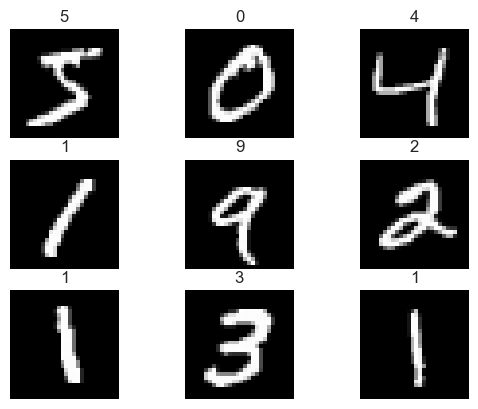

In [184]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.title(y_train[i])
plt.show()

In [185]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [186]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)

In [187]:
y_test = to_categorical(y_test)

# Model Building

In [188]:
from sklearn.model_selection import GridSearchCV
from keras.src.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.optimizers import Adam
from keras_tuner import RandomSearch

def build_model(hp):
    model = Sequential()
    model.add(Flatten(input_shape=[28, 28, 1]))
    for i in range(hp.Int('n_hidden', 2, 4)):
        model.add(Dense(units=hp.Int('n_neurons', 10, 100, 10), activation=hp.Choice('activation', ['relu', 'elu', 'tanh'])))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=Adam(hp.Choice('learning_rate', [0.01, 0.001, 0.0001])), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=3
)
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Trial 10 Complete [00h 00m 57s]
val_accuracy: 0.9487333496411642

Best val_accuracy So Far: 0.9687666694323221
Total elapsed time: 00h 09m 21s


In [189]:
best_model = tuner.get_best_models()[0]

best_model.summary()

# get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


C:\Users\Wojciech\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Wojciech\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 80)             │        62,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 80)             │         6,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 80)             │         6,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 80)             │         6,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,050 (324.41 KB)

 Trainable params: 83,050 (324.41 KB)

 Non-trainable params: 0 (0.00 B)

In [190]:
best_hps.values

{'n_hidden': 4, 'n_neurons': 80, 'activation': 'elu', 'learning_rate': 0.001}

# Best hyperparameters
n_hidden: 4,
n_neurons: 80,
activation: 'elu', 
learning_rate: 0.00

In [191]:
best_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [192]:
history = best_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 936us/step - accuracy: 0.9812 - loss: 0.0688 - val_accuracy: 0.9695 - val_loss: 0.1435
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 890us/step - accuracy: 0.9841 - loss: 0.0614 - val_accuracy: 0.9694 - val_loss: 0.1232
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 848us/step - accuracy: 0.9851 - loss: 0.0518 - val_accuracy: 0.9664 - val_loss: 0.1406
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 851us/step - accuracy: 0.9837 - loss: 0.0569 - val_accuracy: 0.9696 - val_loss: 0.1310
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 851us/step - accuracy: 0.9871 - loss: 0.0476 - val_accuracy: 0.9685 - val_loss: 0.1540
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 861us/step - accuracy: 0.9871 - loss: 0.0472 - val_accuracy: 0.9718 - val_loss: 0.1362
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 856us/step - accuracy: 0.9872 - loss: 0.0436 - val_accuracy: 0.9714 - val_loss: 0.1476
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 857us/step - accuracy: 0.9881 -

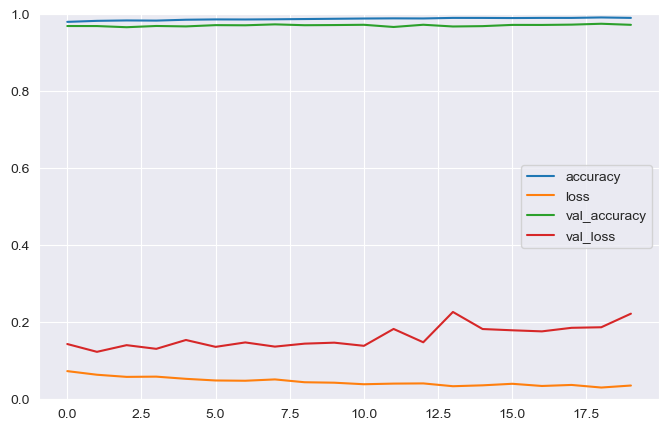

In [193]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [194]:
y_pred = best_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step


In [195]:
y_pred = np.argmax(y_pred, axis=1)

In [196]:
y_test = np.argmax(y_test, axis=1)

In [197]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9726

# Accuracy: 0.9726

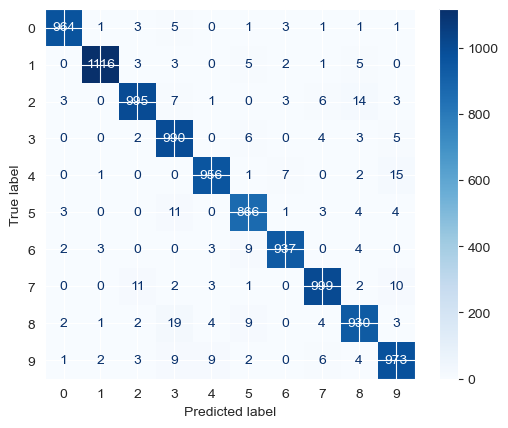

In [198]:
from sklearn import metrics
# change colors
confusion_matrix = metrics.confusion_matrix(y_test, y_pred, labels=np.arange(10))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = np.arange(10),)

cm_display.plot(cmap='Blues', values_format='d')
plt.show()

In [199]:
best_model.save('mnist_nn.keras')